# Model training

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import sys

# add parent directory to python search path
sys.path.append(os.path.abspath('../'))

import config_helper

In [2]:
config = config_helper.read_config('../config.json')

In [83]:
BATCH_SIZE = 32
image_width = config['sign_crop_width']
image_height = config['sign_crop_height']

#load the data
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    config['traffic_signs'],
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=117,
    validation_split=0.2,
    subset='training'
)

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    config['traffic_signs'],
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=117,
    validation_split=0.2,
    subset='validation'
)

print(train_set.class_names)

Found 13457 files belonging to 9 classes.
Using 10766 files for training.
Found 13457 files belonging to 9 classes.
Using 2691 files for validation.
['10', '100', '30', '40', '50', '60', '70', '80', 'other']


2023-01-16 14:00:36.588863: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


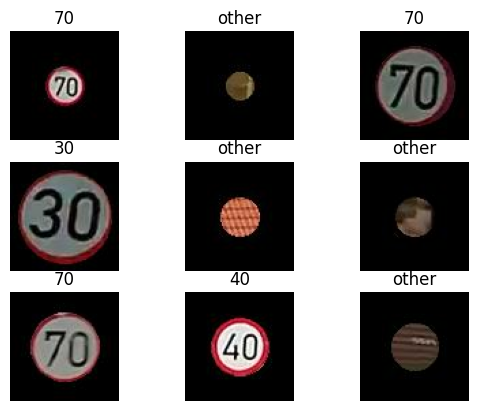

In [4]:
# show some sample images
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_set.class_names[np.argmax(labels[i])])
        plt.axis("off")

In [50]:
# create basic CNN model
def basic_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(len(val_set.class_names), activation='softmax')
    ])
    return model

model = basic_cnn_model()

model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 78, 78, 8)         224       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 39, 39, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 37, 37, 16)        1168      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 18, 18, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 32)        

In [6]:
# train the model
history = model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/10
337/337 [==============================] - 7s 20ms/step - loss: 1.0329 - accuracy: 0.7132 - val_loss: 0.5667 - val_accuracy: 0.8142
Epoch 2/10
337/337 [==============================] - 6s 17ms/step - loss: 0.4096 - accuracy: 0.8694 - val_loss: 0.3217 - val_accuracy: 0.8885
Epoch 3/10
337/337 [==============================] - 6s 17ms/step - loss: 0.2205 - accuracy: 0.9287 - val_loss: 0.2735 - val_accuracy: 0.9171
Epoch 4/10
337/337 [==============================] - 6s 17ms/step - loss: 0.1332 - accuracy: 0.9561 - val_loss: 0.1717 - val_accuracy: 0.9576
Epoch 5/10
337/337 [==============================] - 6s 17ms/step - loss: 0.0982 - accuracy: 0.9693 - val_loss: 0.1595 - val_accuracy: 0.9584
Epoch 6/10
337/337 [==============================] - 7s 19ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.1882 - val_accuracy: 0.9550
Epoch 7/10
337/337 [==============================] - 6s 16ms/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.1520 - val_accuracy: 0.9669

Plot of loss and accuracy of both training and validation set. 

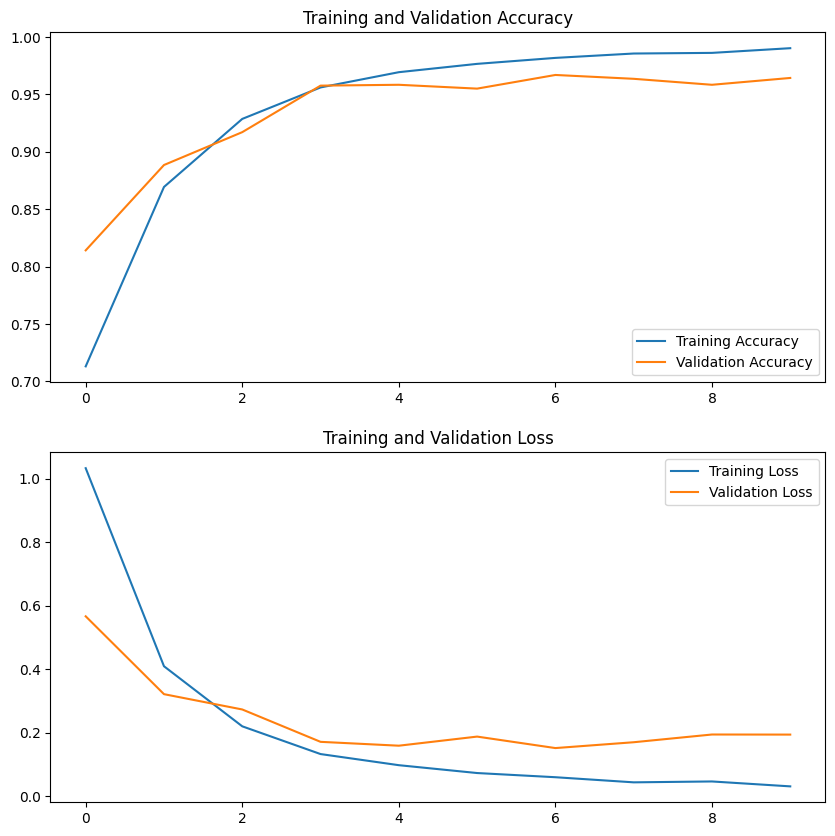

In [7]:
# function to plot loss and accuracy of training and validation sets
def plot_history(history):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(2, 1, 2)
    plt.title('Training and Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

plot_history(history)


In [8]:
# save the model
model.save(config['simple_cnn_model'])

In [52]:
# create a more advanced model with dropout and batch normalization
def create_advanced_model():
    advanced_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), input_shape=(image_width, image_height, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(16, (3, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(32, (3, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(val_set.class_names), activation='softmax')
    ])
    return advanced_model

advanced_model = create_advanced_model()

advanced_model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

advanced_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 78, 78, 8)         224       
                                                                 
 batch_normalization_12 (Bat  (None, 78, 78, 8)        32        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 78, 78, 8)         0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 37, 37, 16)        1168      
                                                                 
 batch_normalization_13 (Bat  (None, 37, 37, 16)      

Epoch 1/10
337/337 [==============================] - 8s 22ms/step - loss: 0.7457 - accuracy: 0.7847 - val_loss: 0.3312 - val_accuracy: 0.8971
Epoch 2/10
337/337 [==============================] - 8s 22ms/step - loss: 0.2430 - accuracy: 0.9237 - val_loss: 0.1596 - val_accuracy: 0.9528
Epoch 3/10
337/337 [==============================] - 8s 23ms/step - loss: 0.1482 - accuracy: 0.9549 - val_loss: 0.1281 - val_accuracy: 0.9647
Epoch 4/10
337/337 [==============================] - 8s 23ms/step - loss: 0.1203 - accuracy: 0.9628 - val_loss: 0.1276 - val_accuracy: 0.9654
Epoch 5/10
337/337 [==============================] - 8s 23ms/step - loss: 0.0860 - accuracy: 0.9745 - val_loss: 0.0974 - val_accuracy: 0.9736
Epoch 6/10
337/337 [==============================] - 8s 23ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.0849 - val_accuracy: 0.9777
Epoch 7/10
337/337 [==============================] - 8s 23ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.1276 - val_accuracy: 0.9677

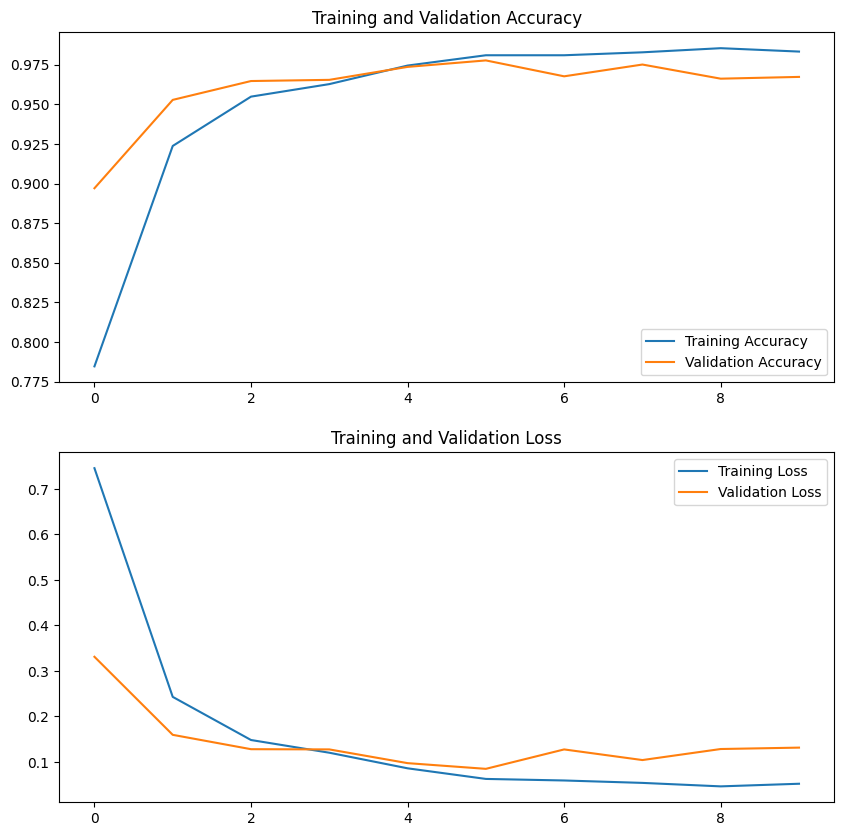

In [10]:
advanced_history = advanced_model.fit(train_set, validation_data=val_set, epochs=10)
plot_history(advanced_history)

In [11]:
advanced_model.save(config['advanced_cnn_model'])

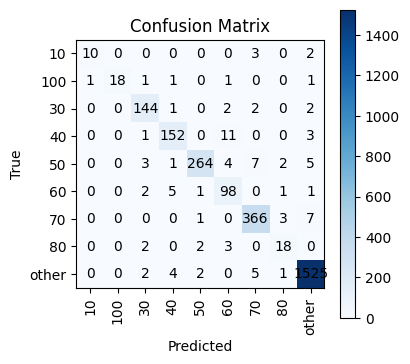

In [12]:
# function to calculate and plot confusion matrix
def plot_confusion_matrix(model, test_set):
    y_true = []
    y_pred = []
    for images, labels in test_set:
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(model.predict(images, verbose=False), axis=1))
    
    cm = tf.math.confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap=plt.cm.Blues)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.xticks(np.arange(len(train_set.class_names)), train_set.class_names, rotation=90)
    plt.yticks(np.arange(len(train_set.class_names)), train_set.class_names)

    plt.title('Confusion Matrix')
    plt.colorbar()
    
    for i in range(len(train_set.class_names)):
        for j in range(len(train_set.class_names)):
            plt.text(j, i, cm[i, j].numpy(), ha='center', va='center', color='black')
    

plot_confusion_matrix(model, val_set)

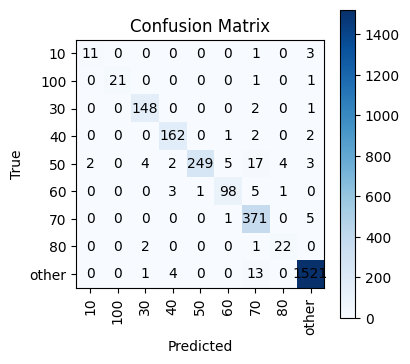

In [13]:
plot_confusion_matrix(advanced_model, val_set)

Simple CNN:	 Precision: 0.914, Recall: 0.869, F1-score: 0.891
Advanced CNN:	 Precision: 0.931, Recall: 0.914, F1-score: 0.923


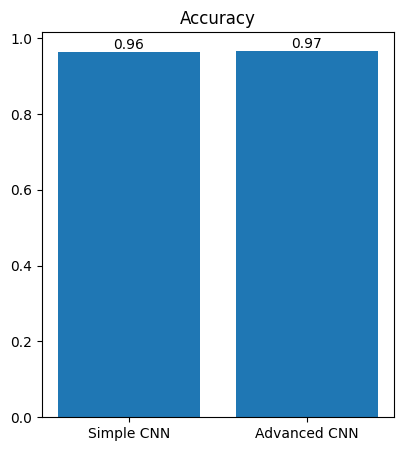

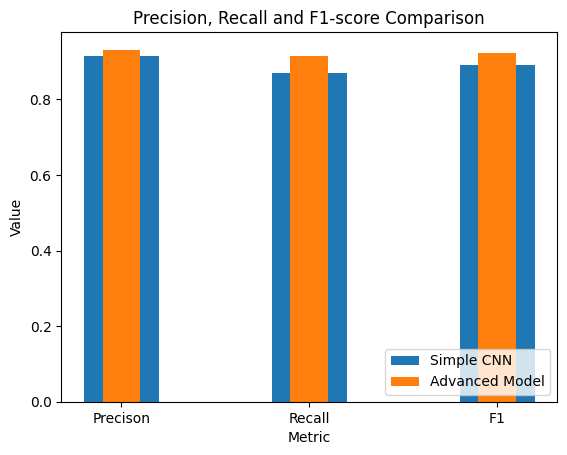

In [35]:
# function to calculate F1-score
def f1_score(model, test_set):
    y_true = []
    y_pred = []
    for images, labels in test_set:
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(model.predict(images, verbose=False), axis=1))
    
    # calculate precision
    precision = metrics.precision_score(y_true, y_pred, average='macro')
    # calculate recall
    recall = metrics.recall_score(y_true, y_pred, average='macro')

    return precision, recall, 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.bar(['Simple CNN', 'Advanced CNN'], [history.history['val_accuracy'][-1], advanced_history.history['val_accuracy'][-1]])
# add labels to the bars
for i, v in enumerate([history.history['val_accuracy'][-1], advanced_history.history['val_accuracy'][-1]]):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')

precision, recall, f1 = f1_score(model, val_set)
precision_adv, recall_adv, f1_adv = f1_score(advanced_model, val_set)

# create a bar plot with precision, recall and f1-score for both models
fig, ax = plt.subplots()

# Plot the data for the two models
ax.bar(['Precison', 'Recall', 'F1'], [precision, recall, f1], label='Simple CNN', width=0.4)
ax.bar(['Precison', 'Recall', 'F1'], [precision_adv, recall_adv, f1_adv], label='Advanced Model', width=0.2)

# Add axis labels and a title
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Precision, Recall and F1-score Comparison')

# Add a legend
ax.legend(loc='lower right')


# print values for precision, recall and f1-score for both models and round to 3 decimal places
print('Simple CNN:\t Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision, recall, f1))
print('Advanced CNN:\t Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision_adv, recall_adv, f1_adv))
